In [1]:
# required libraries
from mesa.batchrunner import BatchRunner, FixedBatchRunner
from model import MemeModel, number_susceptible, number_peak_meme_A, number_peak_meme_B
from model import step_peak_meme_A, step_peak_meme_B, number_bored_A, number_bored_B
from model import number_bored_both, number_interest_A, number_interest_B, number_interest_both
from model import number_steps, percentage_spread, percentage_meme_A_spread, percentage_meme_B_spread 

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# running experiment using mesa batchrunner
# 0. baseline
fixed_params = {
    "num_nodes": 250,
    "n_groups": 5,
    "initial_viral_size_A": 5,
    "initial_viral_size_B": 5,
    "meme_spread_chance": 0.3,
    "maybe_bored": 0.3,
    "influencer_appearance": 3,
    "influencer_spread_chance": 0.6,
    "interest_meme_A_chance": 0.5,
    "interest_meme_B_chance": 0.5
}

batch_run_0 = FixedBatchRunner(
    MemeModel,
    fixed_parameters=fixed_params,
    iterations=50,
    max_steps=100,
    model_reporters={
        "susceptible": number_susceptible,
        "num_steps": number_steps,
        "peak_A": number_peak_meme_A,
        "step_peak_A": step_peak_meme_A,
        "peak_B": number_peak_meme_B,
        "step_peak_B": step_peak_meme_B,
        "bored_A": number_bored_A,
        "bored_B": number_bored_B,
        "bored_both": number_bored_both,
        "interest_A": number_interest_A,
        "interest_B": number_interest_B,
        "interest_both": number_interest_both,
        "percentage_spread": percentage_spread,
        "percentage_meme_A_spread": percentage_meme_A_spread,
        "percentage_meme_B_spread": percentage_meme_B_spread
    }
)

batch_run_0.run_all()

batch_run_0_results = batch_run_0.get_model_vars_dataframe()
batch_run_0_dc = batch_run_0.get_collector_model()


# # preprocessing run column
n = batch_run_0_results.columns[0]
batch_run_0_results.drop(n, axis=1, inplace=True)
run_number = [i+1 for i in range(50)]
batch_run_0_results[n] = run_number
batch_run_0_results.head()

50it [00:07,  6.69it/s]


,bored_A,bored_B,bored_both,interest_A,interest_B,interest_both,num_steps,peak_A,peak_B,percentage_meme_A_spread,...,n_groups,initial_viral_size_A,initial_viral_size_B,meme_spread_chance,maybe_bored,influencer_appearance,influencer_spread_chance,interest_meme_A_chance,interest_meme_B_chance,Run
0,157,131,60,141,126,71,20,94,60,0.688596,...,5,5,5,0.3,0.3,3,0.6,0.5,0.5,1
27,184,87,47,131,118,63,38,81,35,0.821429,...,5,5,5,0.3,0.3,3,0.6,0.5,0.5,2
28,12,210,3,125,147,68,22,7,103,0.054795,...,5,5,5,0.3,0.3,3,0.6,0.5,0.5,3
29,90,171,56,131,133,75,29,45,86,0.439024,...,5,5,5,0.3,0.3,3,0.6,0.5,0.5,4
30,153,107,47,121,134,64,36,61,34,0.718310,...,5,5,5,0.3,0.3,3,0.6,0.5,0.5,5


In [3]:
# building data collection of percentage spread in list format

data_collection_list = []
max_len_data = 0

for v in batch_run_0_dc.values():
    data_list = v['Percentage_spread'].tolist()
    data_collection_list.append(data_list)
    if len(data_list) > max_len_data:
        max_len_data = len(data_list)

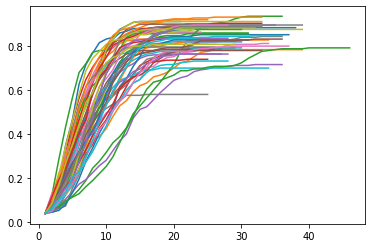

In [4]:
# plotting all of the steps when running 50 iterations

# def pad_or_truncate(some_list, target_len):
#     return some_list[:target_len] + [0]*(target_len - len(some_list))

# max_len_data_list = [i+1 for i in range(max_len_data)]

for lst in data_collection_list:
    plt.plot([i+1 for i in range(len(lst))], lst)
plt.show()

In [5]:
# helper functions in generating xcor and ycor
def generate_cor(data_collection):
    average_dict = {}

    for lst in data_collection:
        for i in range(len(lst)):
            if i not in average_dict:
                average_dict[i] = []
            average_dict[i].append(lst[i])
    
    xcor = []
    ycor = []

    for k, v in average_dict.items():
        xcor.append(k+1)
        ycor.append(sum(v)/len(v))
    
    return xcor, ycor


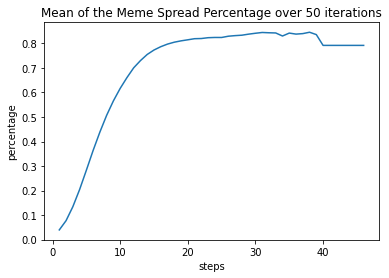

In [6]:
# plotting the mean for each steps running on 50 iterations

xcor, ycor = generate_cor(data_collection_list)

plt.plot(xcor, ycor)
plt.title("Mean of the Meme Spread Percentage over 50 iterations")
plt.xlabel("steps")
plt.ylabel("percentage")
plt.show()


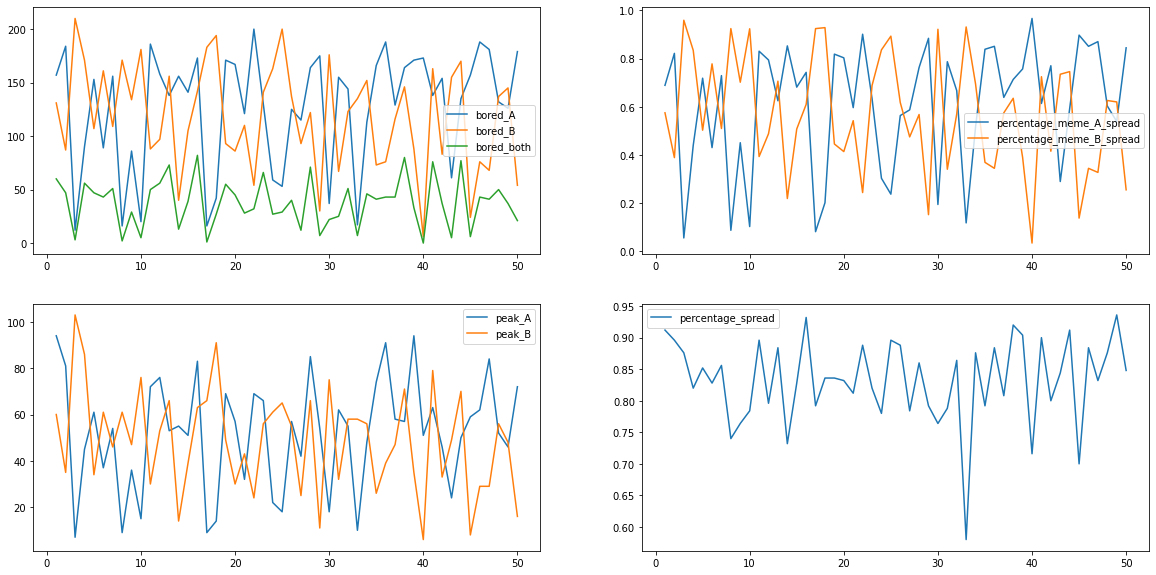

In [7]:
# Line chart of the experiment result

# chart_df = batch_run_0_results.iloc[:, 1:16]
# run_number = [i+1 for i in range(50)]
# chart_df['run'] = run_number

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20,10))

ax1.plot(batch_run_0_results['Run'], batch_run_0_results['bored_A'], label="bored_A")
ax1.plot(batch_run_0_results['Run'], batch_run_0_results['bored_B'], label="bored_B")
ax1.plot(batch_run_0_results['Run'], batch_run_0_results['bored_both'], label="bored_both")
ax1.legend()
ax3.plot(batch_run_0_results['Run'], batch_run_0_results['peak_A'], label="peak_A")
ax3.plot(batch_run_0_results['Run'], batch_run_0_results['peak_B'], label="peak_B")
ax3.legend()
ax2.plot(batch_run_0_results['Run'], batch_run_0_results['percentage_meme_A_spread'], label="percentage_meme_A_spread")
ax2.plot(batch_run_0_results['Run'], batch_run_0_results['percentage_meme_B_spread'], label="percentage_meme_B_spread")
ax2.legend()
ax4.plot(batch_run_0_results['Run'], batch_run_0_results['percentage_spread'], label="percentage_spread")
ax4.legend()
plt.show()

In [8]:
# generate csv file from the batch run
batch_run_0_results.to_csv('experiments/batch_result_0.csv', index=False)

In [9]:
# running experiment using mesa batchrunner
# 1. difference between sparse and dense nodes
fixed_params = {
    "num_nodes": 250,
    "initial_viral_size_A": 5,
    "initial_viral_size_B": 5,
    "meme_spread_chance": 0.3,
    "maybe_bored": 0.3,
    "influencer_appearance": 3,
    "influencer_spread_chance": 0.6,
    "interest_meme_A_chance": 0.5,
    "interest_meme_B_chance": 0.5
}

variable_params = {
    "n_groups": [3, 5, 7],
}

batch_run_1 = BatchRunner(
    MemeModel,
    variable_parameters=variable_params,
    fixed_parameters=fixed_params,
    iterations=50,
    max_steps=100,
    model_reporters={
        "susceptible": number_susceptible,
        "num_steps": number_steps,
        "peak_A": number_peak_meme_A,
        "step_peak_A": step_peak_meme_A,
        "peak_B": number_peak_meme_B,
        "step_peak_B": step_peak_meme_B,
        "bored_A": number_bored_A,
        "bored_B": number_bored_B,
        "bored_both": number_bored_both,
        "interest_A": number_interest_A,
        "interest_B": number_interest_B,
        "interest_both": number_interest_both
    }
)

batch_run_1.run_all()

batch_run_1_results = batch_run_1.get_model_vars_dataframe()
batch_run_1_dc = batch_run_1.get_collector_model()

batch_run_1_results.head()

150it [00:23,  6.50it/s]


,n_groups,Run,bored_A,bored_B,bored_both,interest_A,interest_B,interest_both,num_steps,peak_A,...,susceptible,num_nodes,initial_viral_size_A,initial_viral_size_B,meme_spread_chance,maybe_bored,influencer_appearance,influencer_spread_chance,interest_meme_A_chance,interest_meme_B_chance
0,3,0,57,228,43,131,131,69,27,33,...,8,250,5,5,0.3,0.3,3,0.6,0.5,0.5
1,3,1,209,136,103,132,116,65,29,132,...,8,250,5,5,0.3,0.3,3,0.6,0.5,0.5
2,3,2,215,160,127,129,137,70,24,119,...,2,250,5,5,0.3,0.3,3,0.6,0.5,0.5
3,3,3,185,200,138,133,125,67,30,100,...,3,250,5,5,0.3,0.3,3,0.6,0.5,0.5
4,3,4,115,227,102,117,123,55,18,66,...,10,250,5,5,0.3,0.3,3,0.6,0.5,0.5


In [10]:
# building data collection of percentage spread in list format
# respective to the n_groups

data_collection_g3 = []
data_collection_g5 = []
data_collection_g7 = []

for k, v in batch_run_1_dc.items():
    if k[0] == 3:
        data_collection_g3.append(v['Percentage_spread'].tolist())
    if k[0] == 5:
        data_collection_g5.append(v['Percentage_spread'].tolist())
    if k[0] == 7:
        data_collection_g7.append(v['Percentage_spread'].tolist())

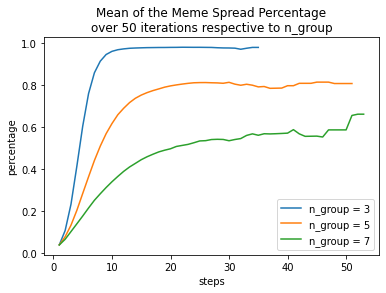

In [11]:
# plotting the mean for each steps running on 50 iterations

xcor_g3, ycor_g3 = generate_cor(data_collection_g3)
xcor_g5, ycor_g5 = generate_cor(data_collection_g5)
xcor_g7, ycor_g7 = generate_cor(data_collection_g7)


plt.plot(xcor_g3, ycor_g3, label="n_group = 3")
plt.plot(xcor_g5, ycor_g5, label="n_group = 5")
plt.plot(xcor_g7, ycor_g7, label="n_group = 7")
plt.title("Mean of the Meme Spread Percentage\nover 50 iterations respective to n_group")
plt.xlabel("steps")
plt.ylabel("percentage")
plt.legend()
plt.show()

In [12]:
# generate csv file from the batch run
batch_run_1_results.to_csv('experiments/batch_result_1.csv', index=False)

In [13]:
# running experiment using mesa batchrunner
# 2. influencer as the variable params

fixed_params = {
    "num_nodes": 250,
    "n_groups": 5,
    "initial_viral_size_A": 5,
    "initial_viral_size_B": 5,
    "meme_spread_chance": 0.3,
    "maybe_bored": 0.3,
    "influencer_spread_chance": 0.6,
    "interest_meme_A_chance": 0.5,
    "interest_meme_B_chance": 0.5
}

variable_params = {
    "influencer_appearance": [1, 3, 5, 7]
}

batch_run_2 = BatchRunner(
    MemeModel,
    variable_parameters=variable_params,
    fixed_parameters=fixed_params,
    iterations=50,
    max_steps=100,
    model_reporters={
        "susceptible": number_susceptible,
        "num_steps": number_steps,
        "peak_A": number_peak_meme_A,
        "step_peak_A": step_peak_meme_A,
        "peak_B": number_peak_meme_B,
        "step_peak_B": step_peak_meme_B,
        "bored_A": number_bored_A,
        "bored_B": number_bored_B,
        "bored_both": number_bored_both,
        "interest_A": number_interest_A,
        "interest_B": number_interest_B,
        "interest_both": number_interest_both
    }
)

batch_run_2.run_all()

batch_run_2_results = batch_run_2.get_model_vars_dataframe()
batch_run_2_dc = batch_run_2.get_collector_model()
batch_run_2_results.head()

200it [00:29,  6.72it/s]


,influencer_appearance,Run,bored_A,bored_B,bored_both,interest_A,interest_B,interest_both,num_steps,peak_A,...,susceptible,num_nodes,n_groups,initial_viral_size_A,initial_viral_size_B,meme_spread_chance,maybe_bored,influencer_spread_chance,interest_meme_A_chance,interest_meme_B_chance
0,1,0,160,149,83,128,134,61,26,87,...,24,250,5,5,5,0.3,0.3,0.6,0.5,0.5
1,1,1,101,123,22,118,135,65,29,48,...,48,250,5,5,5,0.3,0.3,0.6,0.5,0.5
2,1,2,75,113,6,115,133,68,53,20,...,68,250,5,5,5,0.3,0.3,0.6,0.5,0.5
3,1,3,110,176,65,120,133,61,25,50,...,29,250,5,5,5,0.3,0.3,0.6,0.5,0.5
4,1,4,158,69,20,134,122,63,31,47,...,43,250,5,5,5,0.3,0.3,0.6,0.5,0.5


In [14]:
# building data collection of percentage spread in list format
# respective to the n_groups

data_collection_i1 = []
data_collection_i3 = []
data_collection_i5 = []
data_collection_i7 = []

for k, v in batch_run_2_dc.items():
    if k[0] == 1:
        data_collection_i1.append(v['Percentage_spread'].tolist())
    if k[0] == 3:
        data_collection_i3.append(v['Percentage_spread'].tolist())
    if k[0] == 5:
        data_collection_i5.append(v['Percentage_spread'].tolist())
    if k[0] == 7:
        data_collection_i7.append(v['Percentage_spread'].tolist())

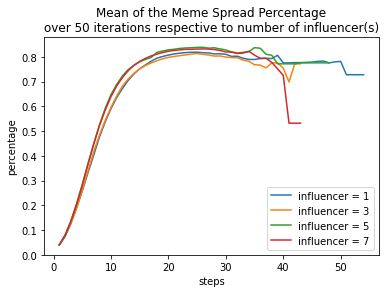

In [15]:
# plotting the mean for each steps running on 50 iterations

xcor_i1, ycor_i1 = generate_cor(data_collection_i1)
xcor_i3, ycor_i3 = generate_cor(data_collection_i3)
xcor_i5, ycor_i5 = generate_cor(data_collection_i5)
xcor_i7, ycor_i7 = generate_cor(data_collection_i7)


plt.plot(xcor_i1, ycor_i1, label="influencer = 1")
plt.plot(xcor_i3, ycor_i3, label="influencer = 3")
plt.plot(xcor_i5, ycor_i5, label="influencer = 5")
plt.plot(xcor_i7, ycor_i7, label="influencer = 7")
plt.title("Mean of the Meme Spread Percentage\nover 50 iterations respective to number of influencer(s)")
plt.xlabel("steps")
plt.ylabel("percentage")
plt.legend()
plt.show()

In [16]:
# generate csv file from the batch run
batch_run_2_results.to_csv('experiments/batch_result_2.csv', index=False)

In [17]:
# running experiment using mesa batchrunner
# 3. bigger viral size for meme A, but more interest to meme B
fixed_params = {
    "num_nodes": 250,
    "n_groups" : 5,
    "initial_viral_size_B": 5,
    "meme_spread_chance": 0.3,
    "maybe_bored": 0.3,
    "influencer_appearance": 3,
    "influencer_spread_chance": 0.6,
    "interest_meme_A_chance": 0.3,
    "interest_meme_B_chance": 0.7
}

variable_params = {
    "initial_viral_size_A": [5, 15, 30, 45]
}

batch_run_3 = BatchRunner(
    MemeModel,
    variable_parameters=variable_params,
    fixed_parameters=fixed_params,
    iterations=50,
    max_steps=100,
    model_reporters={
        "susceptible": number_susceptible,
        "num_steps": number_steps,
        "peak_A": number_peak_meme_A,
        "step_peak_A": step_peak_meme_A,
        "peak_B": number_peak_meme_B,
        "step_peak_B": step_peak_meme_B,
        "bored_A": number_bored_A,
        "bored_B": number_bored_B,
        "bored_both": number_bored_both,
        "interest_A": number_interest_A,
        "interest_B": number_interest_B,
        "interest_both": number_interest_both
    }
)

batch_run_3.run_all()

batch_run_3_results = batch_run_3.get_model_vars_dataframe()
batch_run_3_dc = batch_run_3.get_collector_model()
batch_run_3_results.head()

200it [00:27,  7.16it/s]


,initial_viral_size_A,Run,bored_A,bored_B,bored_both,interest_A,interest_B,interest_both,num_steps,peak_A,...,susceptible,num_nodes,n_groups,initial_viral_size_B,meme_spread_chance,maybe_bored,influencer_appearance,influencer_spread_chance,interest_meme_A_chance,interest_meme_B_chance
0,5,0,8,208,1,89,189,66,25,7,...,35,250,5,5,0.3,0.3,3,0.6,0.3,0.7
1,5,1,15,218,5,82,189,63,28,9,...,22,250,5,5,0.3,0.3,3,0.6,0.3,0.7
2,5,2,10,216,6,70,172,53,36,5,...,30,250,5,5,0.3,0.3,3,0.6,0.3,0.7
3,5,3,38,218,28,73,175,51,28,13,...,22,250,5,5,0.3,0.3,3,0.6,0.3,0.7
4,5,4,7,206,2,73,175,52,30,6,...,39,250,5,5,0.3,0.3,3,0.6,0.3,0.7


In [18]:
# building data collection of percentage spread in list format
# respective to the viral size

data_collection_total_vs5 = []
data_collection_A_vs5 = []
data_collection_B_vs5 = []

data_collection_total_vs15 = []
data_collection_A_vs15 = []
data_collection_B_vs15 = []

data_collection_total_vs30 = []
data_collection_A_vs30 = []
data_collection_B_vs30 = []

data_collection_total_vs45 = []
data_collection_A_vs45 = []
data_collection_B_vs45 = []

for k, v in batch_run_3_dc.items():
    if k[0] == 5:
        data_collection_total_vs5.append(v['Percentage_spread'].tolist())
        data_collection_A_vs5.append(v['Percentage_meme_A'].tolist())
        data_collection_B_vs5.append(v['Percentage_meme_B'].tolist())
    if k[0] == 15:
        data_collection_total_vs15.append(v['Percentage_spread'].tolist())
        data_collection_A_vs15.append(v['Percentage_meme_A'].tolist())
        data_collection_B_vs15.append(v['Percentage_meme_B'].tolist())
    if k[0] == 30:
        data_collection_total_vs30.append(v['Percentage_spread'].tolist())
        data_collection_A_vs30.append(v['Percentage_meme_A'].tolist())
        data_collection_B_vs30.append(v['Percentage_meme_B'].tolist())
    if k[0] == 45:
        data_collection_total_vs45.append(v['Percentage_spread'].tolist())
        data_collection_A_vs45.append(v['Percentage_meme_A'].tolist())
        data_collection_B_vs45.append(v['Percentage_meme_B'].tolist())

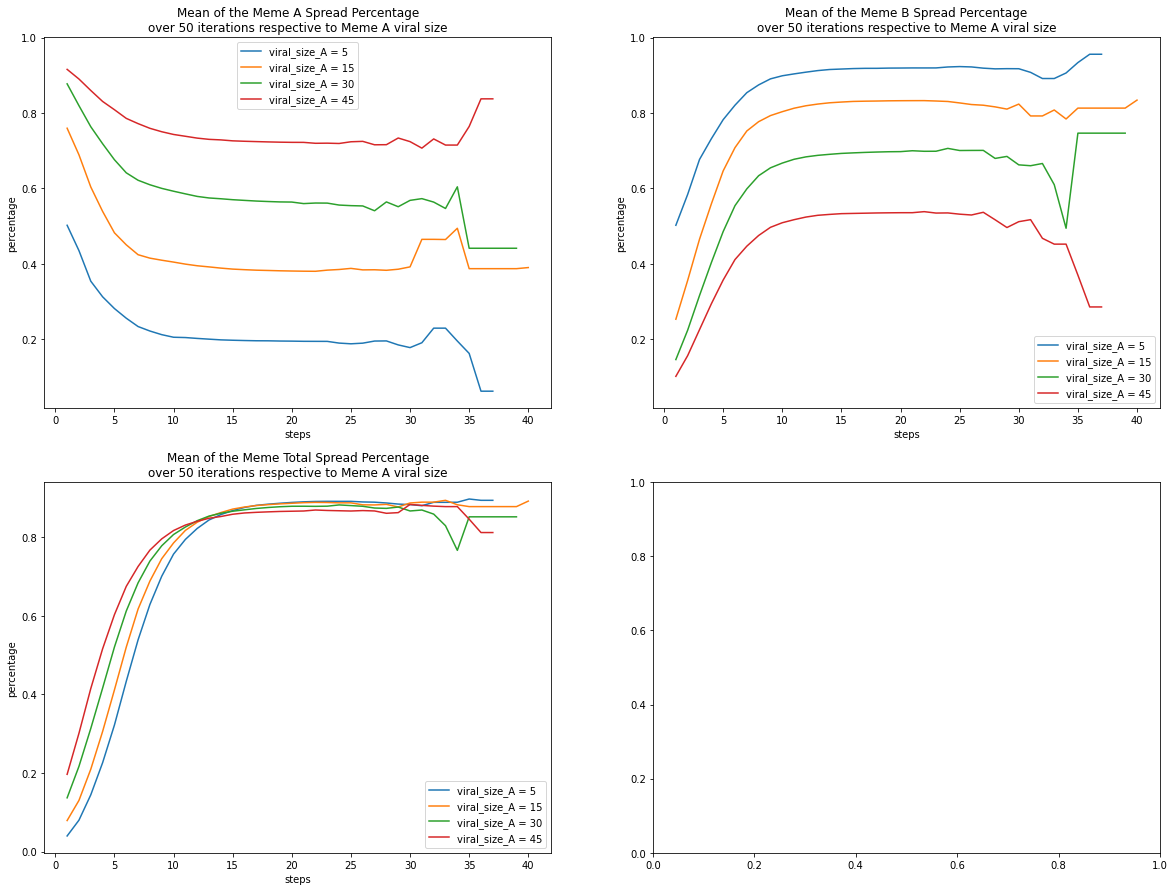

In [19]:
# plotting the mean for each steps running on 50 iterations

xcor_total_vs5, ycor_total_vs5 = generate_cor(data_collection_total_vs5)
xcor_A_vs5, ycor_A_vs5 = generate_cor(data_collection_A_vs5)
xcor_B_vs5, ycor_B_vs5 = generate_cor(data_collection_B_vs5)

xcor_total_vs15, ycor_total_vs15 = generate_cor(data_collection_total_vs15)
xcor_A_vs15, ycor_A_vs15 = generate_cor(data_collection_A_vs15)
xcor_B_vs15, ycor_B_vs15 = generate_cor(data_collection_B_vs15)

xcor_total_vs30, ycor_total_vs30 = generate_cor(data_collection_total_vs30)
xcor_A_vs30, ycor_A_vs30 = generate_cor(data_collection_A_vs30)
xcor_B_vs30, ycor_B_vs30 = generate_cor(data_collection_B_vs30)

xcor_total_vs45, ycor_total_vs45 = generate_cor(data_collection_total_vs45)
xcor_A_vs45, ycor_A_vs45 = generate_cor(data_collection_A_vs45)
xcor_B_vs45, ycor_B_vs45 = generate_cor(data_collection_B_vs45)

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20,15))

ax1.plot(xcor_A_vs5, ycor_A_vs5, label="viral_size_A = 5")
ax1.plot(xcor_A_vs15, ycor_A_vs15, label="viral_size_A = 15")
ax1.plot(xcor_A_vs30, ycor_A_vs30, label="viral_size_A = 30")
ax1.plot(xcor_A_vs45, ycor_A_vs45, label="viral_size_A = 45")

ax2.plot(xcor_B_vs5, ycor_B_vs5, label="viral_size_A = 5")
ax2.plot(xcor_B_vs15, ycor_B_vs15, label="viral_size_A = 15")
ax2.plot(xcor_B_vs30, ycor_B_vs30, label="viral_size_A = 30")
ax2.plot(xcor_B_vs45, ycor_B_vs45, label="viral_size_A = 45")
ax2.sharey(ax1)

ax3.plot(xcor_total_vs5, ycor_total_vs5, label="viral_size_A = 5")
ax3.plot(xcor_total_vs15, ycor_total_vs15, label="viral_size_A = 15")
ax3.plot(xcor_total_vs30, ycor_total_vs30, label="viral_size_A = 30")
ax3.plot(xcor_total_vs45, ycor_total_vs45, label="viral_size_A = 45")

ax1.set_title("Mean of the Meme A Spread Percentage\nover 50 iterations respective to Meme A viral size")
ax1.set(xlabel="steps", ylabel="percentage")
ax1.legend()

ax2.set_title("Mean of the Meme B Spread Percentage\nover 50 iterations respective to Meme A viral size")
ax2.set(xlabel="steps", ylabel="percentage")
ax2.legend()

ax3.set_title("Mean of the Meme Total Spread Percentage\nover 50 iterations respective to Meme A viral size")
ax3.set(xlabel="steps", ylabel="percentage")
ax3.legend()

plt.show()

In [20]:
# generate csv file from the batch run
batch_run_3_results.to_csv('experiments/batch_result_3.csv', index=False)